![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/nlu/blob/master/examples/colab/Training/binary_text_classification/NLU_training_sentiment_classifier_demo_covid_19.ipynb)



# Training a Sentiment Analysis Classifier with NLU 
## 2 Class COVID-19 Sentiment Classifer Training
With the [SentimentDL model](https://nlp.johnsnowlabs.com/docs/en/annotators#sentimentdl-multi-class-sentiment-analysis-annotator)  from Spark NLP you can achieve State Of the Art results on any multi class text classification problem 

This notebook showcases the following features : 

- How to train the deep learning classifier
- How to store a pipeline to disk
- How to load the pipeline from disk (Enables NLU offline mode)


You can achieve these results or even better on this dataset with training data:


<br>

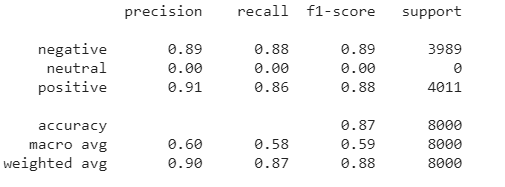


You can achieve these results or even better on this dataset with training data:


<br>

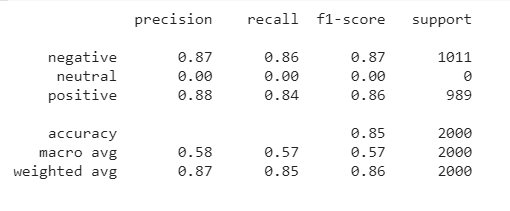

# 1. Install Java 8 and NLU

In [ ]:
import os
from sklearn.metrics import classification_report
! apt-get update -qq > /dev/null   
# Install java|
! apt-get install -y openjdk-8-jdk-headless -qq > /dev/null
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["PATH"] = os.environ["JAVA_HOME"] + "/bin:" + os.environ["PATH"]
! pip install  pyspark==2.4.7 
! pip install nlu > /dev/null    



import nlu

     |████████████████████████████████| 217.9MB 73kB/s 
     |████████████████████████████████| 204kB 22.0MB/s 
  Created wheel for pyspark: filename=pyspark-2.4.7-py2.py3-none-any.whl size=218279465 sha256=fbb7c2e44539433abea58a5db430b789061641d87940efb6113dd4a2b40403ee
  Stored in directory: /root/.cache/pip/wheels/34/1f/2e/1e7460f80acf26b08dbb8c53d7ff9e07146f2a68dd5c732be5
Successfully built pyspark


# 2. Download Coivd19 NLP Text Sentiemnt Classifcation    dataset 
https://www.kaggle.com/datatattle/covid-19-nlp-text-classification
#Context

This is a Dataset made of tweets about coivid 19 

In [ ]:
! wget http://ckl-it.de/wp-content/uploads/2021/02/Corona_NLP_train.csv

--2021-02-25 08:38:17--  http://ckl-it.de/wp-content/uploads/2021/02/Corona_NLP_train.csv
Resolving ckl-it.de (ckl-it.de)... 217.160.0.108, 2001:8d8:100f:f000::209
Connecting to ckl-it.de (ckl-it.de)|217.160.0.108|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5293639 (5.0M) [text/csv]
Saving to: ‘Corona_NLP_train.csv’

Corona_NLP_train.cs 100%[===================>]   5.05M  2.68MB/s    in 1.9s    

2021-02-25 08:38:19 (2.68 MB/s) - ‘Corona_NLP_train.csv’ saved [5293639/5293639]



In [ ]:
import pandas as pd
train_path = '/content/Corona_NLP_train.csv'

train_df = pd.read_csv(train_path)
# the text data to use for classification should be in a column named 'text'
columns=['text','y']
train_df = train_df[columns]
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(train_df, test_size=0.2)
train_df

,text,y
1696,A sickening attack on a Salisbury councillor h...,negative
4290,If you answered yes what kind of bottle does y...,positive
9998,Currently at the food bank. We appreciate our ...,positive
9106,*Take note of the following against covid 19* ...,positive
1459,Please all give a shout out to our amazing sup...,positive
...,...,...
5428,So online grocery shopping is now almost impos...,positive
7097,When you fill your fridge with ice for a #musi...,negative
6465,#ChipChirpsÂ from #VLSIresearch's app. #weVIS...,positive
7188,Are We Respecting The Hustle Of People Reselli...,positive


# 3. Train Deep Learning Classifier using nlu.load('train.sentiment')

You dataset label column should be named 'y' and the feature column with text data should be named 'text'

In [ ]:
import nlu 
# load a trainable pipeline by specifying the train. prefix  and fit it on a datset with label and text columns
# by default the Universal Sentence Encoder (USE) Sentence embeddings are used for generation
trainable_pipe = nlu.load('train.sentiment')
fitted_pipe = trainable_pipe.fit(train_df.iloc[:50])

# predict with the trainable pipeline on dataset and get predictions
preds = fitted_pipe.predict(train_df.iloc[:50],output_level='document')
#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['sentiment']))

preds

tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[OK!]
              precision    recall  f1-score   support

    negative       1.00      0.21      0.34        24
     neutral       0.00      0.00      0.00         0
    positive       0.70      1.00      0.83        26

    accuracy                           0.62        50
   macro avg       0.57      0.40      0.39        50
weighted avg       0.85      0.62      0.59        50



,sentiment,sentiment_confidence,default_name_embeddings,text,y,document
origin_index,,,,,,
0,positive,0.761295,"[0.004783493932336569, -0.02814795821905136, -...",#Cheerios maker @GeneralMills on Wednesday rai...,positive,#Cheerios maker @GeneralMills on Wednesday rai...
1,positive,0.924655,"[0.018235845491290092, 0.05186385661363602, -0...",Got to visit this morning where they have swit...,positive,Got to visit this morning where they have swit...
2,neutral,0.552810,"[-0.010089528746902943, -0.03414658457040787, ...",Got a video doctors appointment first thing as...,negative,Got a video doctors appointment first thing as...
3,negative,0.607435,"[-0.03430407866835594, 0.015884995460510254, -...",More likely to die from starvation during a 2 ...,negative,More likely to die from starvation during a 2 ...
4,positive,0.934333,"[0.05470110848546028, 0.0018378241220489144, 0...",Don't move around unnecessary \r\r\r\nStay at...,positive,Don't move around unnecessary Stay at home. Us...
5,positive,0.852907,"[0.0012291448656469584, 0.049797337502241135, ...",My dad who is a professor just discover about ...,positive,My dad who is a professor just discover about ...
6,neutral,0.528781,"[0.03790939226746559, -0.013407733291387558, -...","Riverfront Times: Cody Pfister, the 26-year-ol...",negative,"Riverfront Times: Cody Pfister, the 26-year-ol..."
7,positive,0.771463,"[0.04207884147763252, 0.02299105003476143, 0.0...",At sale of sanitizers at factory prices is a m...,positive,At sale of sanitizers at factory prices is a m...
8,positive,0.708429,"[-0.03874765709042549, -0.006220388226211071, ...",Watch this if you are one of those idiots who ...,negative,Watch this if you are one of those idiots who ...


# 4. Test the fitted pipe on new example

In [ ]:
fitted_pipe.predict("Everything is under control !")

,sentiment,sentiment_confidence,default_name_embeddings,document
origin_index,,,,
0,negative,0.690746,"[0.027917474508285522, -0.06684374064207077, -...",Everything is under control !


## 5. Configure pipe training parameters

In [ ]:
trainable_pipe.print_info()

The following parameters are configurable for this NLU pipeline (You can copy paste the examples) :
>>> pipe['sentiment_dl'] has settable params:
pipe['sentiment_dl'].setMaxEpochs(2)                 | Info: Maximum number of epochs to train | Currently set to : 2
pipe['sentiment_dl'].setLr(0.005)                    | Info: Learning Rate | Currently set to : 0.005
pipe['sentiment_dl'].setBatchSize(64)                | Info: Batch size | Currently set to : 64
pipe['sentiment_dl'].setDropout(0.5)                 | Info: Dropout coefficient | Currently set to : 0.5
pipe['sentiment_dl'].setEnableOutputLogs(True)       | Info: Whether to use stdout in addition to Spark logs. | Currently set to : True
pipe['sentiment_dl'].setThreshold(0.6)               | Info: The minimum threshold for the final result otheriwse it will be neutral | Currently set to : 0.6
pipe['sentiment_dl'].setThresholdLabel('neutral')    | Info: In case the score is less than threshold, what should be the label. Default i

##6. Retrain with new parameters

In [ ]:
# Train longer!
trainable_pipe['sentiment_dl'].setMaxEpochs(5)  
fitted_pipe = trainable_pipe.fit(train_df.iloc[:50])
# predict with the trainable pipeline on dataset and get predictions
preds = fitted_pipe.predict(train_df.iloc[:50],output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['sentiment']))

preds

              precision    recall  f1-score   support

    negative       0.96      1.00      0.98        24
     neutral       0.00      0.00      0.00         0
    positive       1.00      0.92      0.96        26

    accuracy                           0.96        50
   macro avg       0.65      0.64      0.65        50
weighted avg       0.98      0.96      0.97        50



,sentiment,sentiment_confidence,default_name_embeddings,text,y,document
origin_index,,,,,,
0,neutral,0.501342,"[0.004783493932336569, -0.02814795821905136, -...",#Cheerios maker @GeneralMills on Wednesday rai...,positive,#Cheerios maker @GeneralMills on Wednesday rai...
1,positive,0.988317,"[0.018235845491290092, 0.05186385661363602, -0...",Got to visit this morning where they have swit...,positive,Got to visit this morning where they have swit...
2,negative,0.919849,"[-0.010089528746902943, -0.03414658457040787, ...",Got a video doctors appointment first thing as...,negative,Got a video doctors appointment first thing as...
3,negative,0.969353,"[-0.03430407866835594, 0.015884995460510254, -...",More likely to die from starvation during a 2 ...,negative,More likely to die from starvation during a 2 ...
4,positive,0.988857,"[0.05470110848546028, 0.0018378241220489144, 0...",Don't move around unnecessary \r\r\r\nStay at...,positive,Don't move around unnecessary Stay at home. Us...
5,positive,0.943565,"[0.0012291448656469584, 0.049797337502241135, ...",My dad who is a professor just discover about ...,positive,My dad who is a professor just discover about ...
6,negative,0.905861,"[0.03790939226746559, -0.013407733291387558, -...","Riverfront Times: Cody Pfister, the 26-year-ol...",negative,"Riverfront Times: Cody Pfister, the 26-year-ol..."
7,negative,0.648055,"[0.04207884147763252, 0.02299105003476143, 0.0...",At sale of sanitizers at factory prices is a m...,positive,At sale of sanitizers at factory prices is a m...
8,negative,0.938932,"[-0.03874765709042549, -0.006220388226211071, ...",Watch this if you are one of those idiots who ...,negative,Watch this if you are one of those idiots who ...


# 7. Try training with different Embeddings

In [ ]:
# We can use nlu.print_components(action='embed_sentence') to see every possibler sentence embedding we could use. Lets use bert!
nlu.print_components(action='embed_sentence')

For language <en> NLU provides the following Models : 
nlu.load('en.embed_sentence') returns Spark NLP model tfhub_use
nlu.load('en.embed_sentence.use') returns Spark NLP model tfhub_use
nlu.load('en.embed_sentence.tfhub_use') returns Spark NLP model tfhub_use
nlu.load('en.embed_sentence.use.lg') returns Spark NLP model tfhub_use_lg
nlu.load('en.embed_sentence.tfhub_use.lg') returns Spark NLP model tfhub_use_lg
nlu.load('en.embed_sentence.albert') returns Spark NLP model albert_base_uncased
nlu.load('en.embed_sentence.electra') returns Spark NLP model sent_electra_small_uncased
nlu.load('en.embed_sentence.electra_small_uncased') returns Spark NLP model sent_electra_small_uncased
nlu.load('en.embed_sentence.electra_base_uncased') returns Spark NLP model sent_electra_base_uncased
nlu.load('en.embed_sentence.electra_large_uncased') returns Spark NLP model sent_electra_large_uncased
nlu.load('en.embed_sentence.bert') returns Spark NLP model sent_bert_base_uncased
nlu.load('en.embed_sentenc

In [ ]:
trainable_pipe = nlu.load('en.embed_sentence.small_bert_L12_768 train.sentiment')
# We need to train longer and user smaller LR for NON-USE based sentence embeddings usually
# We could tune the hyperparameters further with hyperparameter tuning methods like gridsearch
# Also longer training gives more accuracy
trainable_pipe['sentiment_dl'].setMaxEpochs(120)  
trainable_pipe['sentiment_dl'].setLr(0.0005) 
fitted_pipe = trainable_pipe.fit(train_df)
# predict with the trainable pipeline on dataset and get predictions
preds = fitted_pipe.predict(train_df,output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['sentiment']))

#preds

sent_small_bert_L12_768 download started this may take some time.
Approximate size to download 392.9 MB
[OK!]
              precision    recall  f1-score   support

    negative       0.89      0.88      0.89      3989
     neutral       0.00      0.00      0.00         0
    positive       0.91      0.86      0.88      4011

    accuracy                           0.87      8000
   macro avg       0.60      0.58      0.59      8000
weighted avg       0.90      0.87      0.88      8000



# 7.1 evaluate on Test Data

In [ ]:
preds = fitted_pipe.predict(test_df,output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['sentiment']))

              precision    recall  f1-score   support

    negative       0.87      0.86      0.87      1011
     neutral       0.00      0.00      0.00         0
    positive       0.88      0.84      0.86       989

    accuracy                           0.85      2000
   macro avg       0.58      0.57      0.57      2000
weighted avg       0.87      0.85      0.86      2000



# 8. Lets save the model

In [ ]:
stored_model_path = './models/classifier_dl_trained' 
fitted_pipe.save(stored_model_path)

Stored model in ./models/classifier_dl_trained


# 9. Lets load the model from HDD.
This makes Offlien NLU usage possible!   
You need to call nlu.load(path=path_to_the_pipe) to load a model/pipeline from disk.

In [ ]:
hdd_pipe = nlu.load(path=stored_model_path)

preds = hdd_pipe.predict('Everything is under control !')
preds

,sentiment,sentiment_confidence,en_embed_sentence_small_bert_L12_768_embeddings,document
origin_index,,,,
0,negative,0.948881,"[0.37780338525772095, 0.29955390095710754, 0.1...",Everything is under control !


In [ ]:
hdd_pipe.print_info()

The following parameters are configurable for this NLU pipeline (You can copy paste the examples) :
>>> pipe['document_assembler'] has settable params:
pipe['document_assembler'].setCleanupMode('shrink')            | Info: possible values: disabled, inplace, inplace_full, shrink, shrink_full, each, each_full, delete_full | Currently set to : shrink
>>> pipe['sentence_detector'] has settable params:
pipe['sentence_detector'].setCustomBounds([])                  | Info: characters used to explicitly mark sentence bounds | Currently set to : []
pipe['sentence_detector'].setDetectLists(True)                 | Info: whether detect lists during sentence detection | Currently set to : True
pipe['sentence_detector'].setExplodeSentences(False)           | Info: whether to explode each sentence into a different row, for better parallelization. Defaults to false. | Currently set to : False
pipe['sentence_detector'].setMaxLength(99999)                  | Info: Set the maximum allowed length for ea